# 1. VISUALIZATION WITH MATPLOTLIB AND SEABORN

### Setting up the system environment for Windows & Linux

In [1]:
import os
import sys

os.environ["JAVA_HOME"] = "JDK 8"
os.environ["PYSPARK_PYTHON"] = sys.executable
os.environ["PYSPARK_DRIVER_PYTHON"] = sys.executable

### Setting up the system environment for Mac

In [2]:
import os
import sys

os.environ["JAVA_HOME"] = "JDK 8/Contents/Home"
os.environ["PYSPARK_PYTHON"] = sys.executable
os.environ["PYSPARK_DRIVER_PYTHON"] = sys.executable

In [3]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## 1.1. COMMON VISUALS FOR EDA

For the purpose of this program, we are going to cover just a few types of visuals. Among them, we have:

### 1.1.1. Bar chart

Bar Charts in Data Analysis:

• Bar charts, also known as bar graphs, visually represent data in a structured and easy-to-understand format.

• They allow comparison of categories or groups, representing summary values for one discrete level.

• They highlight differences between categories or other discrete data, serving as a screening method for identifying possible relationships.

• Bar charts provide valuable insights when understanding the relationship between two categorical variables.

• They can be used to assess how well a delivery service meets its promises during peak and off-peak hours.

• Bar charts provide a clear and concise way to convey information, making them essential in data analysis.

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql import types as T
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Create a Spark session
spark = SparkSession.builder.appName("SalesAnalysis").getOrCreate()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyspark/bin/spark-class: line 71: JDK 8/Contents/Home/bin/java: No such file or directory
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyspark/bin/spark-class: line 97: CMD: bad array subscript
head: illegal line count -- -1


PySparkRuntimeError: [JAVA_GATEWAY_EXITED] Java gateway process exited before sending its port number.

In [17]:
path = "/Users/tomdursley/Downloads/cleaned_data.csv"

spark = SparkSession.builder.appName("SalesAnalysis").getOrCreate()
df = spark.read.csv(path, header=True, inferSchema=True)
top_product_line = df.groupBy("PRODUCTLINE")
df.printSchema()
df.show()












25/02/06 18:19:31 WARN Utils: Your hostname, Toms-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.1.69 instead (on interface en0)
25/02/06 18:19:31 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/02/06 18:19:33 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


root
 |-- QUANTITYORDERED: integer (nullable = true)
 |-- PRICEEACH: double (nullable = true)
 |-- SALES: double (nullable = true)
 |-- ORDERDATE: string (nullable = true)
 |-- STATUS: string (nullable = true)
 |-- PRODUCTLINE: string (nullable = true)
 |-- MSRP: integer (nullable = true)
 |-- PRODUCTCODE: string (nullable = true)
 |-- CUSTOMERNAME: string (nullable = true)
 |-- PHONE: string (nullable = true)
 |-- ADDRESSLINE1: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- COUNTRY: string (nullable = true)
 |-- CONTACTLASTNAME: string (nullable = true)
 |-- CONTACTFIRSTNAME: string (nullable = true)
 |-- DEALSIZE: string (nullable = true)

+---------------+---------+-------+----------+-------+-----------+----+-----------+--------------------+----------------+--------------------+-------------+---------+---------------+----------------+--------+
|QUANTITYORDERED|PRICEEACH|  SALES| ORDERDATE| STATUS|PRODUCTLINE|MSRP|PRODUCTCODE|        CUSTOMERNAME|           PHONE| 

**Q1: What are the top 5 product lines by total sales?**

In [14]:
from pyspark.sql.functions import sum, col
from pyspark.sql import functions as F

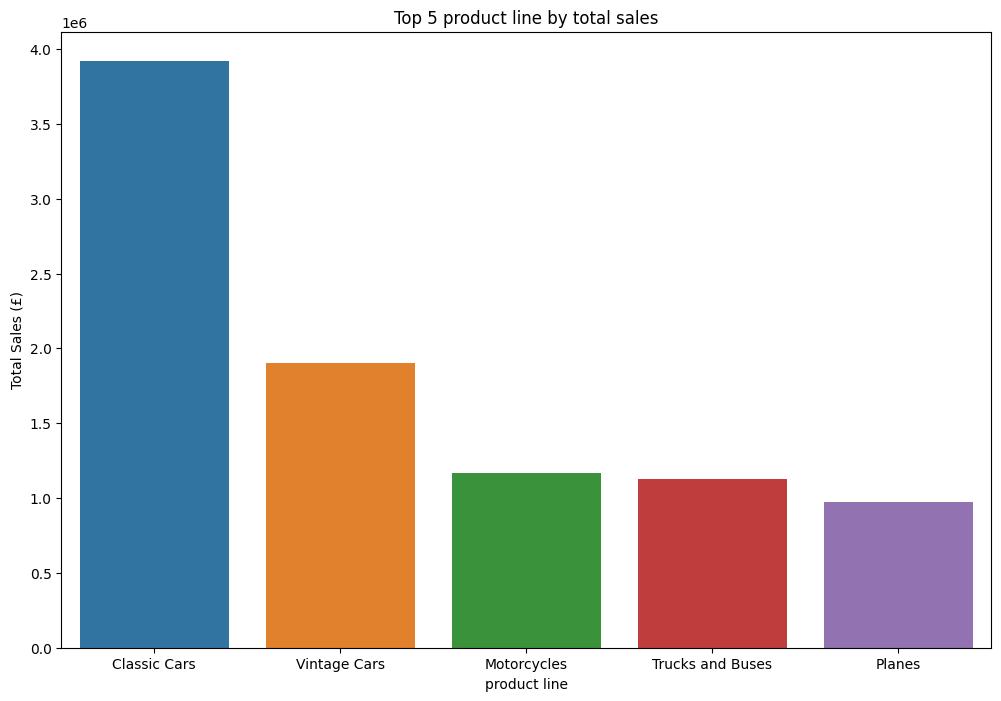

In [22]:
top_product_line = df.groupBy("PRODUCTLINE").agg(F.sum("SALES").alias("TOTAL_SALES"))\
.orderBy(F.col("TOTAL_SALES").desc()).limit(5).toPandas()


plt.figure(figsize=(12,8))
sns.barplot(data=top_product_line, x="PRODUCTLINE", y="TOTAL_SALES", hue="PRODUCTLINE")
plt.title("Top 5 product line by total sales")
plt.xlabel("product line")
plt.ylabel("Total Sales (£)")
plt.show()

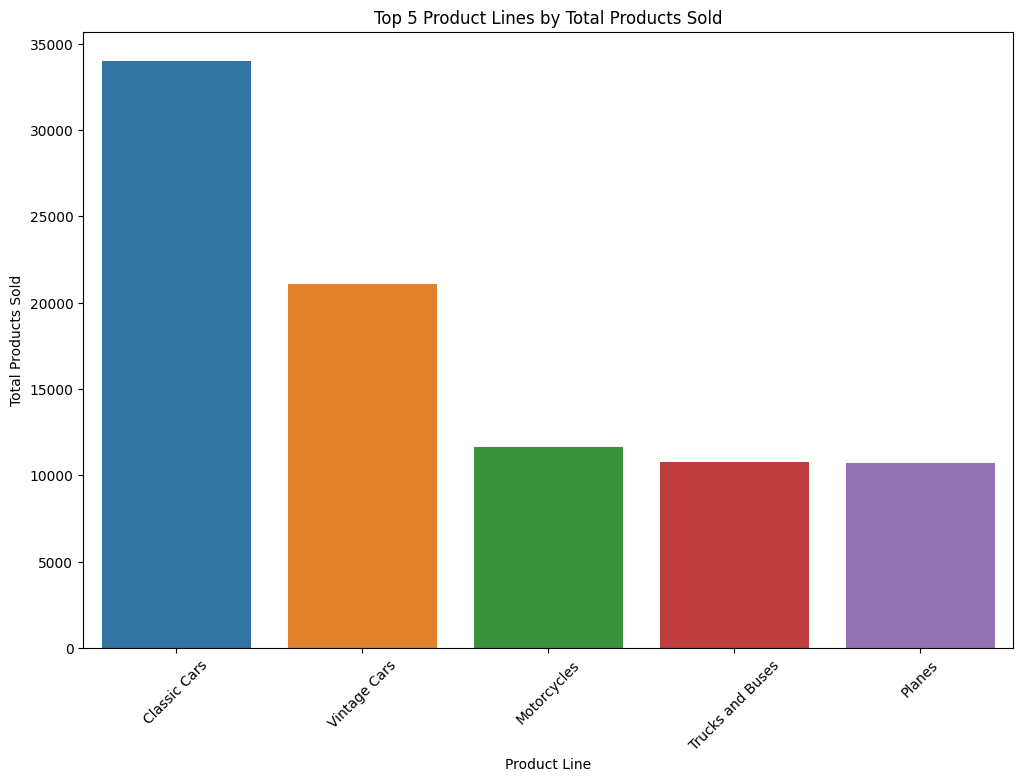

Top 5 Product Lines by Total Products Sold:
        PRODUCTLINE  TOTAL_PRODUCTS_SOLD
0      Classic Cars                33992
1      Vintage Cars                21069
2       Motorcycles                11663
3  Trucks and Buses                10777
4            Planes                10727


In [28]:
top_product_lines_sold = df.groupBy("PRODUCTLINE") \
    .agg(F.sum("QUANTITYORDERED").alias("TOTAL_PRODUCTS_SOLD")) \
    .orderBy(F.col("TOTAL_PRODUCTS_SOLD").desc()) \
    .limit(5) \
    .toPandas()

plt.figure(figsize=(12, 8))
sns.barplot(data=top_product_lines_sold, x="PRODUCTLINE", y="TOTAL_PRODUCTS_SOLD",hue="PRODUCTLINE")
plt.title("Top 5 Product Lines by Total Products Sold")
plt.xlabel("Product Line")
plt.ylabel("Total Products Sold")
plt.xticks(rotation=45)
plt.show()

# Print Results
print("Top 5 Product Lines by Total Products Sold:")
print(top_product_lines_sold)

### 1.1.2. Line chart

Line Charts in Data Analysis

• Supports monitoring of data behavior.

• Highlights differences and correlations within data.

• Helps viewers make predictions about future events.

• Emphasizes changes in a metric on the Y-axis by another variable on the X-axis.

**Q2: How do sales vary by country?**

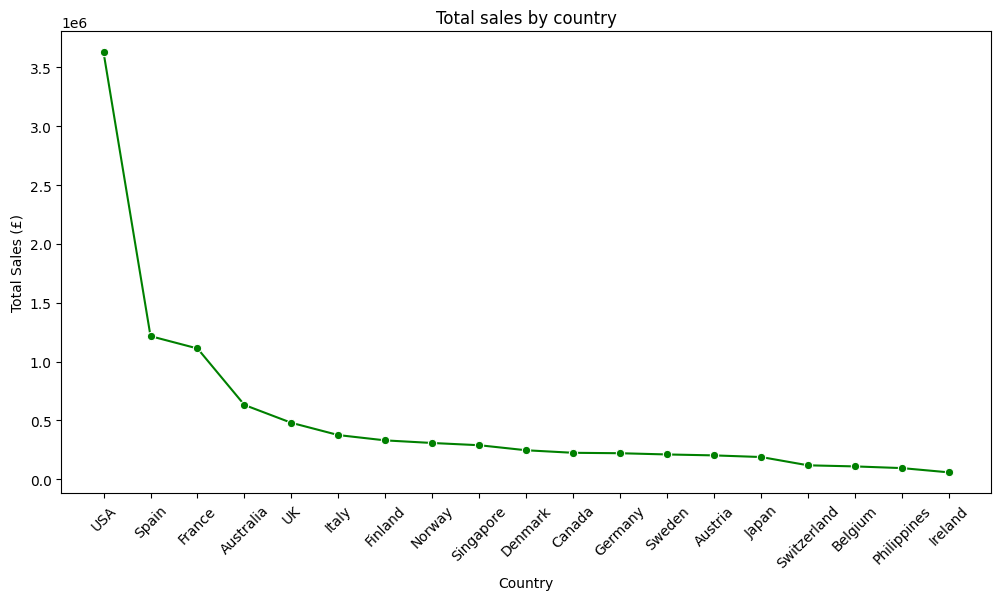

In [32]:
country_sales = df.groupby("COUNTRY").agg(F.sum("SALES").alias("TOTAL_SALES")) \
    .orderBy(F.col("TOTAL_SALES").desc()).toPandas()
    

plt.figure(figsize=(12,6))
sns.lineplot(x="COUNTRY", y="TOTAL_SALES", data=country_sales, marker="o", color = "green")

plt.title("Total sales by country")
plt.xlabel("Country")
plt.ylabel("Total Sales (£)")
plt.xticks(rotation=45)
plt.show()


AttributeError: 'list' object has no attribute 'stale'

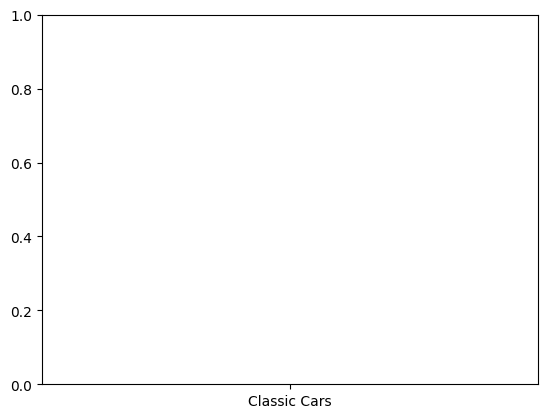

In [40]:


# First bar plot
sns.barplot(
    data=top_product_line,
    x="PRODUCTLINE",
    y="TOTAL_SALES",
    hue="PRODUCTLINE",
    axes=[0]
)
axes[0].set_title("Product by Sales")

# Second bar plot
sns.barplot(
    data=top_product_quantity,
    x="PRODUCTLINE",
    y="TOTAL_QUANTITY",
    hue="PRODUCTLINE",
    axes=[1]
)
axes[1].set_title("Product by Quantity")

plt.tight_layout()  # Adjust layout to pr
plt.show()

### 1.1.3. Pie chart

Pie Chart Overview:

• Depicts the relationship of parts to the whole for a categorical variable.

• Each segment represents the proportional contribution of a specific category to the whole.

• Helps understand the parts-to-a-whole relationship, especially when visualizing a small number of categories.

• Used for categorical data, including nominal and ordinal data.

• Not suitable for situations requiring multiple categories, precise numerical comparisons, or showing changes over time.

**Categorical Data Color Palette:**

+ Dark blue: #12436D
+ Turquoise: #28A197
+ Dark pink: #801650
+ Orange: #F46A25
+ Dark grey: #3D3D3D
+ Purple: #A285D1
***
**Alternative Color Schemes:**

+ #2085ec (Tint of dodgerblue)
+ #72b4eb (Tint of lightskyblue)
+ #0a417a (Tint of darkslateblue)
+ #8464a0 (Tint of mediumpurple)
+ #cea9bc (Tint of thistle)
+ #323232 (Shade of Black)
***
**Simple Pie Chart Color Scheme:**

+ Burnt Sienna: #EC6B56
+ Crayola's Maize: #FFC154
+ Keppel: #47B39C
***
**Standard Color Names:**

+ Red: #FF0000
+ Green: #00FF00
+ Blue: #0000FF
+ Cyan: #00FFFF
+ Magenta: #FF00FF
+ Yellow: #FFFF00
+ Black: #000000
+ White: #FFFFFF
***

**Q3: What is the distribution of deal sizes?**

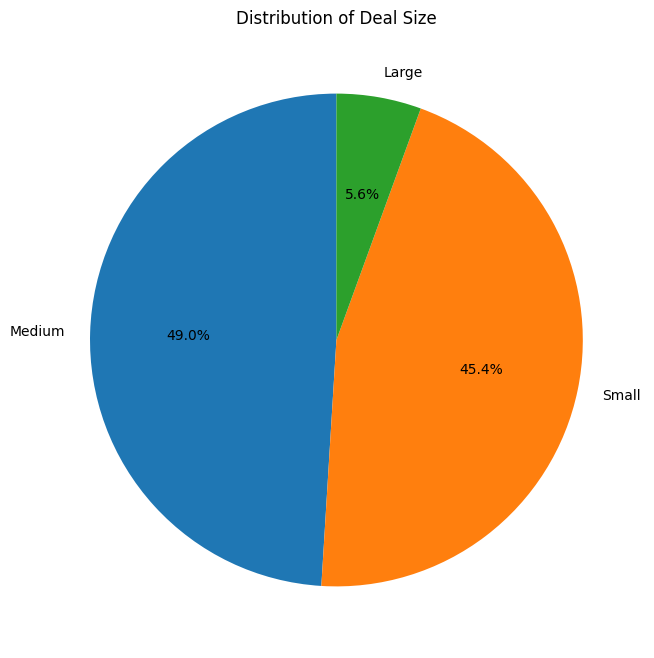

In [44]:
deal_size_dist = df.groupBy("DEALSIZE").count().toPandas()

plt.figure(figsize=(12, 8))
plt.pie(deal_size_dist['count'], labels=deal_size_dist['DEALSIZE'], autopct='%1.1f%%', startangle=90)

plt.title("Distribution of Deal Size")
plt.show()

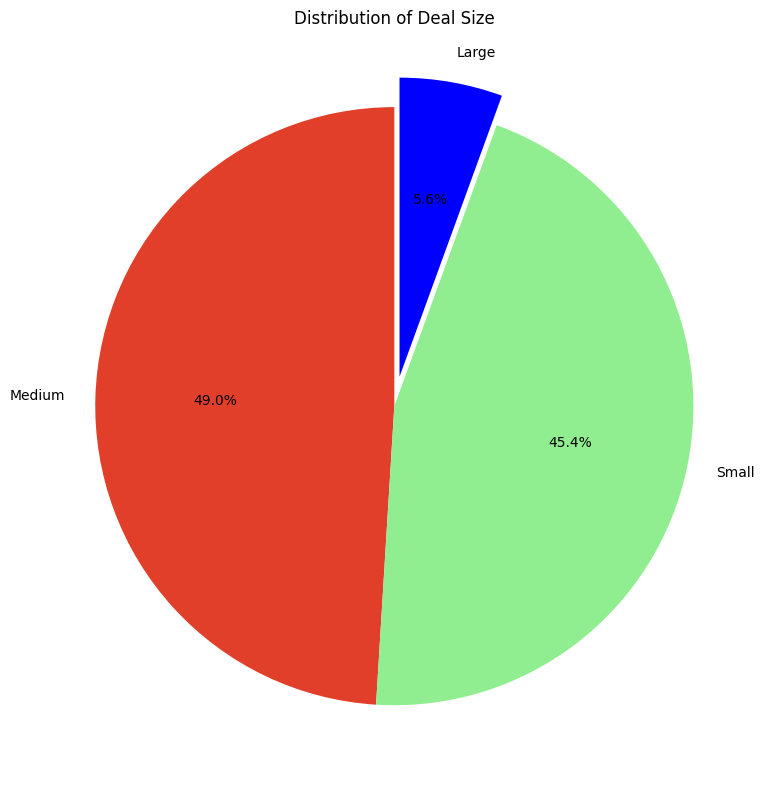

In [45]:
colors = ['#E13F29', 'lightgreen', 'blue']
explode = (0,0,0.1)

plt.figure(figsize=(12, 8))
plt.pie(deal_size_dist['count'], colors=colors, labels=deal_size_dist['DEALSIZE'], explode=explode, autopct='%1.1f%%', startangle=90)

plt.title("Distribution of Deal Size")

plt.tight_layout()

**Q4: Who are the top 10 customers by total purchase amount?**

**Q5: What is the relationship between quantity ordered and price each?**